In [3]:
import numpy as np
import matplotlib.pyplot as plt
import utility
from tic_env import TictactoeEnv, OptimalPlayer
from q_learning import Q_learner, Q_learner_exploration
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
seed = 1998
np.random.seed(seed)

**Q.1.**

In [5]:
alpha = 0.05
gamma = 0.99
epsilon = 0.05

In [6]:
%%time
training_number = 20000
q_learner = Q_learner(alpha, gamma, epsilon, seed=seed)
rewards = q_learner.train(training_number, 0.5)

Wall time: 2min 4s


Text(0.5, 1.0, 'average reward over the last 250 games with $\\epsilon=0.05$')

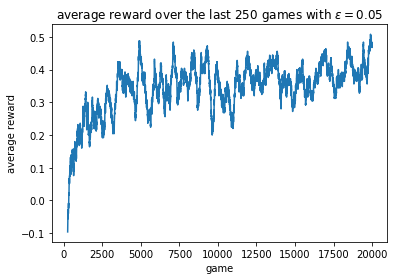

In [7]:
window_size = 250

plt.figure(0)
plt.plot(np.arange(training_number-window_size+1)+window_size, np.convolve(rewards, np.ones(window_size), 'valid') / window_size)
plt.xlabel('game')
plt.ylabel('average reward')
plt.title(r'average reward over the last 250 games with $\epsilon=0.05$')

**Q.2.**

In [8]:
alpha = 0.05
gamma = 0.99
epsilon_min = 0.1
epsilon_max = 0.8
n_stars = np.linspace(1, 40000, 10)

In [9]:
print(n_stars)

[1.00000000e+00 4.44533333e+03 8.88966667e+03 1.33340000e+04
 1.77783333e+04 2.22226667e+04 2.66670000e+04 3.11113333e+04
 3.55556667e+04 4.00000000e+04]


In [10]:
%%time

training_number = 20000
rewards_iter = []
for n_star in n_stars:
    q_learner = Q_learner_exploration(alpha, gamma, epsilon_min, epsilon_max, n_star, seed=seed)
    rewards_iter.append(q_learner.train(training_number, 0.5))

Wall time: 21min 47s


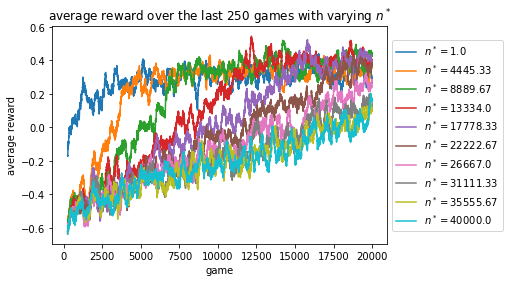

In [11]:
window_size = 250

plt.figure(0)
for n_star, rewards in zip(n_stars, rewards_iter):
    plt.plot(np.arange(training_number-window_size+1)+window_size, np.convolve(rewards, np.ones(window_size), 'valid') / window_size, label=r'$n^*=${}'.format(np.round(n_star, decimals=2)))
plt.xlabel('game')
plt.ylabel('average reward')
plt.title(r'average reward over the last 250 games with varying $n^*$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Q.3.**

In [12]:
alpha = 0.05
gamma = 0.99
epsilon_min = 0.1
epsilon_max = 0.8
n_stars = np.linspace(1, 40000, 10)

In [13]:
%%time

training_number = 20000
window_size = 250

M_opts_iter = []
M_rands_iter = []

for n_star in n_stars:
    M_opts = []
    M_rands = []
    
    q_learner = Q_learner_exploration(alpha, gamma, epsilon_min, epsilon_max, n_star, seed=seed)
    for i in range(int(training_number/window_size)):
        q_learner.train(window_size, 0.5)
        
        M_opts.append(utility.M_opt(q_learner))
        M_rands.append(utility.M_rand(q_learner))
    
    M_opts_iter.append(M_opts)
    M_rands_iter.append(M_rands)

Wall time: 1h 35min 55s


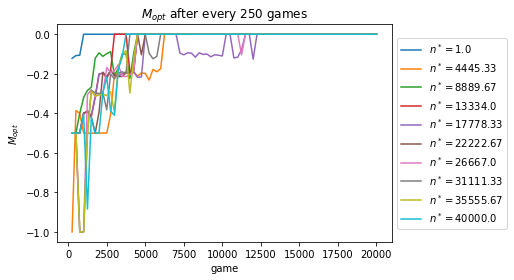

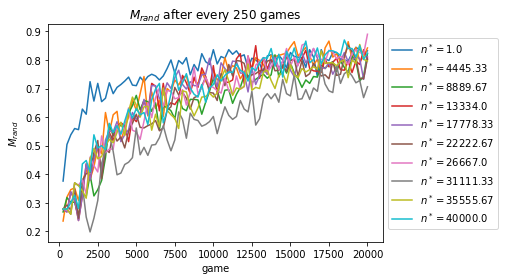

In [14]:
ratio = int(training_number/window_size)

plt.figure(0)
for n_star, M_opts in zip(n_stars, M_opts_iter):
    plt.plot((np.arange(ratio)+1)*window_size, M_opts, label=r'$n^*=${}'.format(np.round(n_star, decimals=2)))
plt.xlabel('game')
plt.ylabel(r'$M_{opt}$')
plt.title(r'$M_{opt}$ after every 250 games')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(1)
for n_star, M_rands in zip(n_stars, M_rands_iter):
    plt.plot((np.arange(ratio)+1)*window_size, M_rands, label=r'$n^*=${}'.format(np.round(n_star, decimals=2)))
plt.xlabel('game')
plt.ylabel(r'$M_{rand}$')
plt.title(r'$M_{rand}$ after every 250 games')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Q.4.**

In [15]:
alpha = 0.05
gamma = 0.99
epsilon_min = 0.1
epsilon_max = 0.8
n_star = 1 # empirically determined best value

epsilon_opts = np.linspace(0, 1, 10)

In [16]:
%%time

training_number = 20000
window_size = 250

M_opts_iter = []
M_rands_iter = []

for epsilon_opt in epsilon_opts:  
    M_opts = []
    M_rands = []
    
    q_learner = Q_learner_exploration(alpha, gamma, epsilon_min, epsilon_max, n_star, seed=seed)
    for i in range(int(training_number/window_size)):
        q_learner.train(window_size, epsilon_opt)
        
        M_opts.append(utility.M_opt(q_learner))
        M_rands.append(utility.M_rand(q_learner))
    
    M_opts_iter.append(M_opts)
    M_rands_iter.append(M_rands)

Wall time: 1h 5min 46s


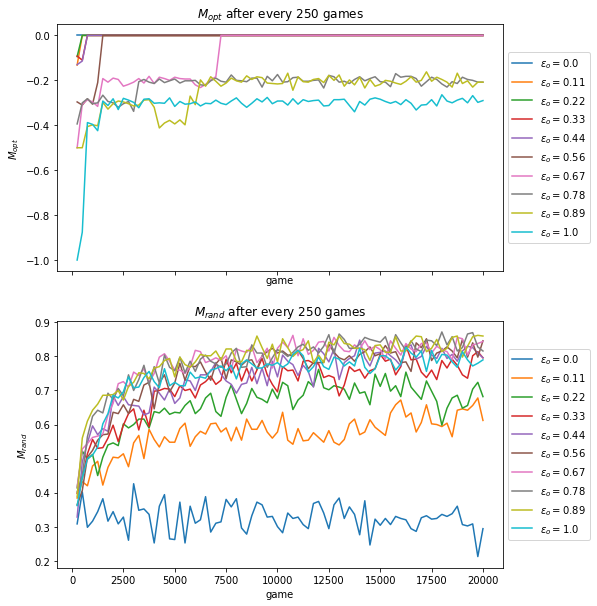

In [24]:
ratio = int(training_number/window_size)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 10))

for epsilon_opt, M_opts in zip(epsilon_opts, M_opts_iter):
    ax1.plot((np.arange(ratio)+1)*window_size, M_opts, label=r'$\epsilon_o=${}'.format(np.round(epsilon_opt, decimals=2)))
ax1.set_xlabel('game')
ax1.set_ylabel(r'$M_{opt}$')
ax1.set_title(r'$M_{opt}$ after every 250 games')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for epsilon_opt, M_rands in zip(epsilon_opts, M_rands_iter):
    ax2.plot((np.arange(ratio)+1)*window_size, M_rands, label=r'$\epsilon_o=${}'.format(np.round(epsilon_opt, decimals=2)))
ax2.set_xlabel('game')
ax2.set_ylabel(r'$M_{rand}$')
ax2.set_title(r'$M_{rand}$ after every 250 games')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Q.5.**

In [23]:
for epsilon_opt, opt_max, rand_max in zip(epsilon_opts, [np.max(np.array(M_opts)) for M_opts in M_opts_iter], [np.max(np.array(M_rands)) for M_rands in M_rands_iter]):
    print(r'epsilon_opt={} : max M_opt={} M_rand={}'.format(epsilon_opt, opt_max, rand_max))

epsilon_opt=0.0 : max M_opt=0.0 M_rand=0.426
epsilon_opt=0.1111111111111111 : max M_opt=0.0 M_rand=0.678
epsilon_opt=0.2222222222222222 : max M_opt=0.0 M_rand=0.762
epsilon_opt=0.3333333333333333 : max M_opt=0.0 M_rand=0.832
epsilon_opt=0.4444444444444444 : max M_opt=0.0 M_rand=0.848
epsilon_opt=0.5555555555555556 : max M_opt=0.0 M_rand=0.852
epsilon_opt=0.6666666666666666 : max M_opt=0.0 M_rand=0.862
epsilon_opt=0.7777777777777777 : max M_opt=-0.17 M_rand=0.872
epsilon_opt=0.8888888888888888 : max M_opt=-0.162 M_rand=0.862
epsilon_opt=1.0 : max M_opt=-0.264 M_rand=0.828


**Q.6**

No they would not, since the optimal values are not unique against Opt(1), in particular there exists some optimal values playing against Opt(1) which are not optimal when playing against Opt(0). One can actually see that playing against $\epsilon_{opt} = 0$ (which corresponds to training against Opt(0)) leads to optimal $M_{opt}$, i.e. it learns to optimal $Q$ values when playing against Opt(0), but $M_{rand}$ are suboptimal, the learner having learned to tie but not how to exploit victories which are unachievable when playing against Opt(0), hence it is suboptimal against Opt(1). The converse holds for $\epsilon_{opt} = 1$ (which corresponds to training against Opt(1). Hence training against various Opt(-) lead to different $Q$ values as they perform differently when comparing $M_{opt}$ and $M_{rand}$.

**Q.7**

In [25]:
alpha = 0.05
gamma = 0.99
epsilons = np.linspace(0, 1, 10)

In [26]:
%%time

training_number = 20000
window_size = 250

M_opts_iter = []
M_rands_iter = []

for epsilon in epsilons:  
    M_opts = []
    M_rands = []
    
    q_learner = Q_learner(alpha, gamma, epsilon, seed=seed)
    for i in range(int(training_number/window_size)):
        q_learner.self_train(window_size)
        
        M_opts.append(utility.M_opt(q_learner))
        M_rands.append(utility.M_rand(q_learner))
    
    M_opts_iter.append(M_opts)
    M_rands_iter.append(M_rands)

Wall time: 32min 27s


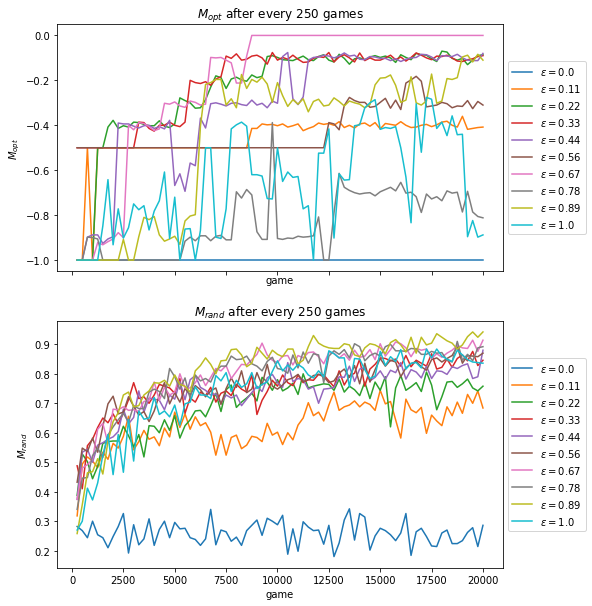

In [27]:
ratio = int(training_number/window_size)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 10))

for epsilon, M_opts in zip(epsilons, M_opts_iter):
    ax1.plot((np.arange(ratio)+1)*window_size, M_opts, label=r'$\epsilon=${}'.format(np.round(epsilon, decimals=2)))
ax1.set_xlabel('game')
ax1.set_ylabel(r'$M_{opt}$')
ax1.set_title(r'$M_{opt}$ after every 250 games')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for epsilon, M_rands in zip(epsilons, M_rands_iter):
    ax2.plot((np.arange(ratio)+1)*window_size, M_rands, label=r'$\epsilon=${}'.format(np.round(epsilon, decimals=2)))
ax2.set_xlabel('game')
ax2.set_ylabel(r'$M_{rand}$')
ax2.set_title(r'$M_{rand}$ after every 250 games')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Q.8**

In [28]:
alpha = 0.05
gamma = 0.99
epsilon_min = 0.1
epsilon_max = 0.8
n_stars = np.logspace(0, 5, 10)

In [29]:
%%time

training_number = 20000
window_size = 250

M_opts_iter = []
M_rands_iter = []

for n_star in n_stars:
    M_opts = []
    M_rands = []
    
    q_learner = Q_learner_exploration(alpha, gamma, epsilon_min, epsilon_max, n_star, seed=seed)
    for i in range(int(training_number/window_size)):
        q_learner.self_train(window_size)
        
        M_opts.append(utility.M_opt(q_learner))
        M_rands.append(utility.M_rand(q_learner))
    
    M_opts_iter.append(M_opts)
    M_rands_iter.append(M_rands)

Wall time: 31min 42s


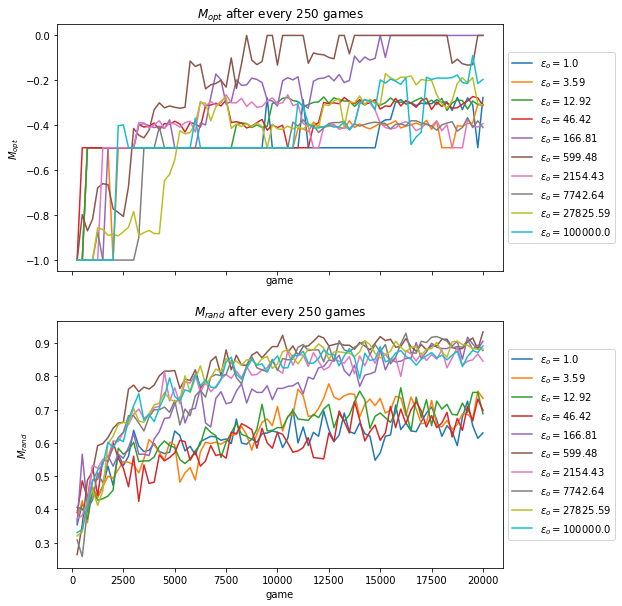

In [30]:
ratio = int(training_number/window_size)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 10))

for n_star, M_opts in zip(n_stars, M_opts_iter):
    ax1.plot((np.arange(ratio)+1)*window_size, M_opts, label=r'$\epsilon_o=${}'.format(np.round(n_star, decimals=2)))
ax1.set_xlabel('game')
ax1.set_ylabel(r'$M_{opt}$')
ax1.set_title(r'$M_{opt}$ after every 250 games')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for n_star, M_rands in zip(n_stars, M_rands_iter):
    ax2.plot((np.arange(ratio)+1)*window_size, M_rands, label=r'$\epsilon_o=${}'.format(np.round(n_star, decimals=2)))
ax2.set_xlabel('game')
ax2.set_ylabel(r'$M_{rand}$')
ax2.set_title(r'$M_{rand}$ after every 250 games')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Q.9**

In [31]:
for n_star, opt_max, rand_max in zip(n_stars, [np.max(np.array(M_opts)) for M_opts in M_opts_iter], [np.max(np.array(M_rands)) for M_rands in M_rands_iter]):
    print(r'n_star={} : max M_opt={} M_rand={}'.format(n_star, opt_max, rand_max))

n_star=1.0 : max M_opt=-0.276 M_rand=0.726
n_star=3.5938136638046276 : max M_opt=-0.306 M_rand=0.778
n_star=12.91549665014884 : max M_opt=-0.274 M_rand=0.766
n_star=46.4158883361278 : max M_opt=-0.272 M_rand=0.732
n_star=166.81005372000593 : max M_opt=0.0 M_rand=0.918
n_star=599.4842503189409 : max M_opt=0.0 M_rand=0.934
n_star=2154.4346900318847 : max M_opt=-0.264 M_rand=0.888
n_star=7742.636826811277 : max M_opt=-0.366 M_rand=0.93
n_star=27825.59402207126 : max M_opt=-0.17 M_rand=0.908
n_star=100000.0 : max M_opt=-0.09 M_rand=0.892


**Q.10**

In [44]:
training_number = 20000
alpha = 0.05
gamma = 0.99
epsilon_min = 0.1
epsilon_max = 0.8
n_star = 100000 #chosen to have high exploration

q_learner = Q_learner_exploration(alpha, gamma, epsilon_min, epsilon_max, n_star, seed=seed)
rewards = q_learner.self_train(training_number)

[[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  0.]]
X turn


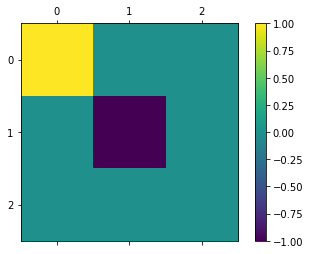

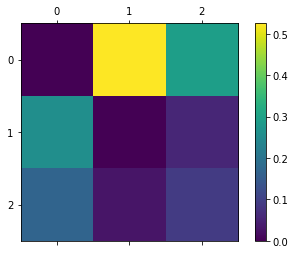

In [48]:
state = np.array([[1., 0., 0.], [0., -1., 0.], [0., 0., 0.]])
figure = plt.figure()
axes = figure.add_subplot(111)
matrix_axes = axes.matshow(state)
figure.colorbar(matrix_axes)

utility.show_Q_s(q_learner, state)
print(state)
print("X turn")

[[-1.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
O turn


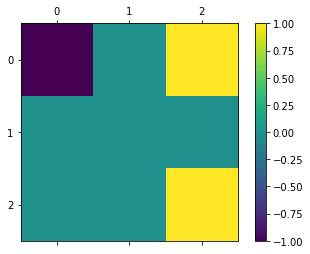

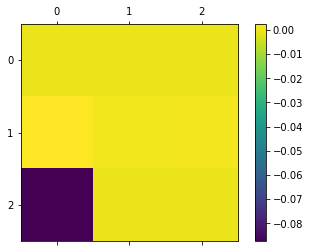

In [49]:
state = np.array([[-1., 0., 1.], [0., 0., 0.], [0., 0., 1.]])
figure = plt.figure()
axes = figure.add_subplot(111)
matrix_axes = axes.matshow(state)
figure.colorbar(matrix_axes)

utility.show_Q_s(q_learner, state)
print(state)
print("O turn")

[[ 1.  0.  1.]
 [-1.  0.  0.]
 [ 0. -1.  0.]]
X turn


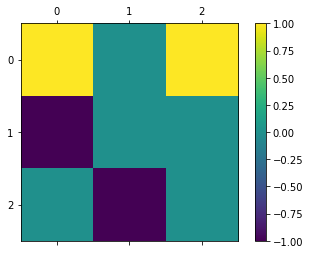

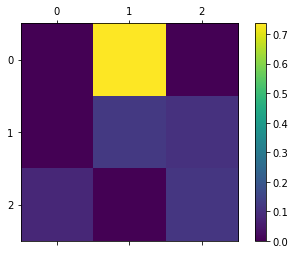

In [50]:
state = np.array([[1., 0., 1.], [-1., 0., 0.], [0., -1., 0.]])
figure = plt.figure()
axes = figure.add_subplot(111)
matrix_axes = axes.matshow(state)
figure.colorbar(matrix_axes)

utility.show_Q_s(q_learner, state)
print(state)
print("X turn")